# Data Visualization: Matplotlib | Seaborn | Plotly

## 1. Matplotlib : MATLAB style plotting Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Relative Permeability Plots

In [3]:
# Sw = water saturation
# krw = relative permeability of water
# kro = relative permeability of oil
Sw = np.linspace(0,1,100)
krw = Sw**3
kro = (1-Sw)**3

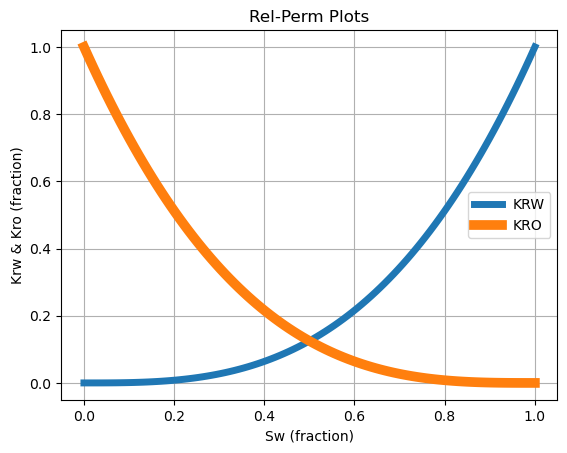

In [11]:
plt.style.use('default')

plt.plot(Sw,krw, label='KRW',lw=5)

plt.plot(Sw, kro, label='KRO',lw=7)
plt.xlabel('Sw (fraction)')
plt.ylabel('Krw & Kro (fraction)')

plt.title('Rel-Perm Plots')

plt.legend(loc='best')
#plt.plot(x,y1, x,y2)


plt.grid()
plt.show()

### Scatter Plot

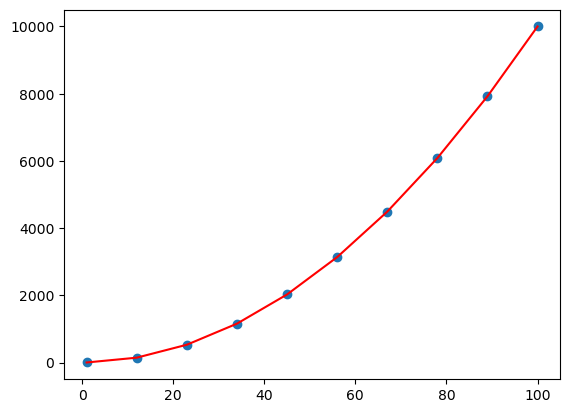

In [25]:
#x = np.random.randint(1,100,1000)
x = np.linspace(1,100,10)
#y = np.random.randint(1,20,10)
y = x**2
plt.scatter(x,y)
plt.plot(x,y, color='red')

#### Histogram & Barplots

In [26]:
phi_sst = np.random.normal(loc=25,scale=10,size=100)
phi_ist = np.random.normal(10,5,100)

df = pd.DataFrame({'S':phi_sst, 'C':phi_ist})
df.head()

,S,C
0,3.300136,12.965181
1,27.081690,11.060373
2,29.270925,10.660836
3,15.377649,9.370638
4,31.739343,12.999207


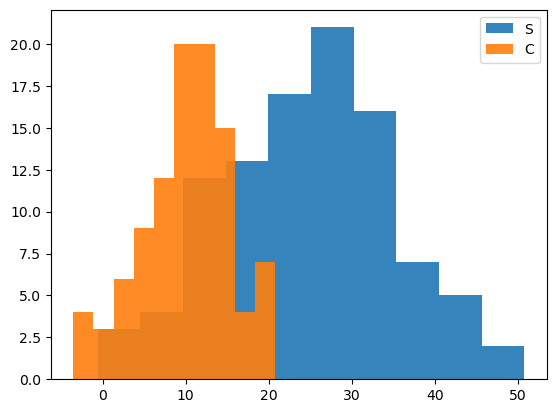

In [29]:
plt.hist(df['S'], alpha=0.9,label='S')
plt.hist(df['C'], alpha=0.9, label='C' )

plt.legend()
plt.show()

### Subplots

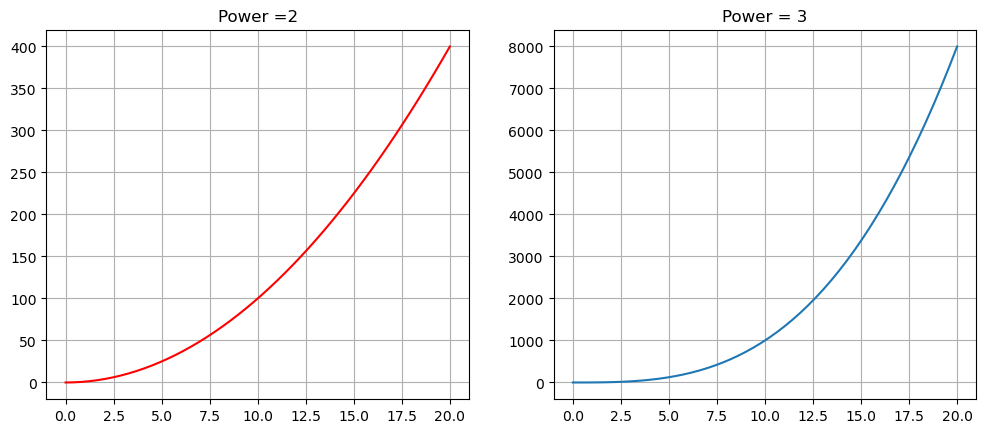

In [40]:
# Step 1: Data creation
x = np.linspace(0,20)
y1 = x**2
y2 = x**3

# Step 2: Subplots

fig, ax = plt.subplots(nrows =1, ncols=2)
fig.set_figwidth(12)

# plot 1
ax[0].plot(x,y1,"r")
ax[0].set_title('Power =2')
ax[0].grid()

# plot 2
ax[1].plot(x,y2)
ax[1].set_title('Power = 3')
ax[1].grid()

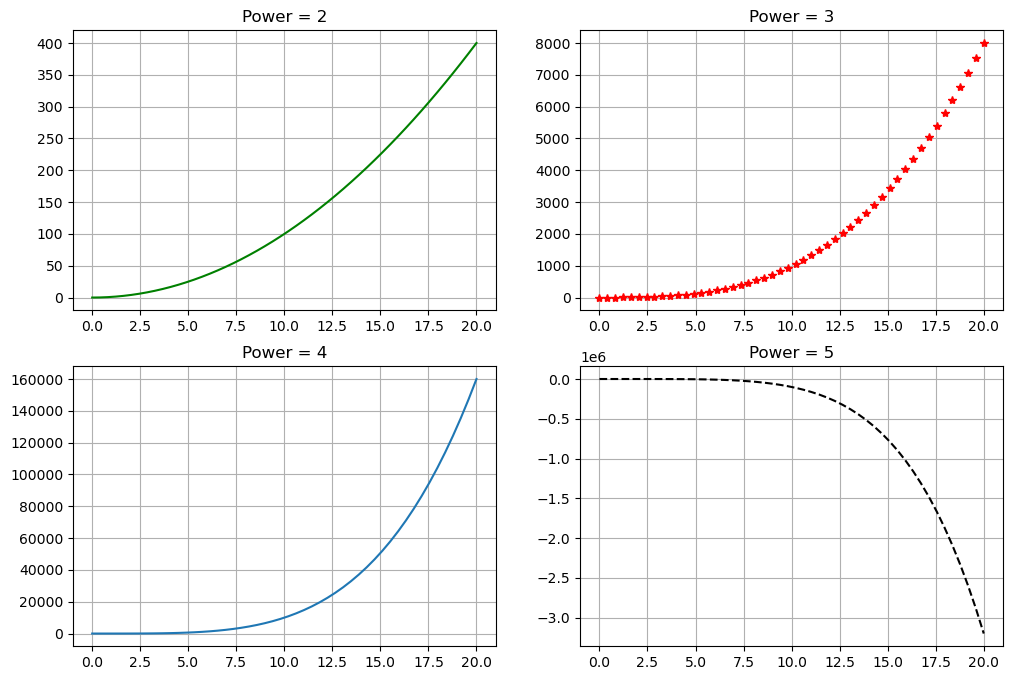

In [58]:
x= np.linspace(0,20)
y1 = x**2
y2 = x**3
y3 = x**4
y4 = -x**5 

fig, ax= plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(12)
fig.set_figheight(8)

ax[0,0].plot(x,y1,'g')
ax[0,0].set_title('Power = 2')
ax[0,0].grid()

ax[0,1].plot(x,y2,'*',color='r')
ax[0,1].set_title('Power = 3')
ax[0,1].grid()

ax[1,0].plot(x,y3)
ax[1,0].set_title('Power = 4')
ax[1,0].grid()

ax[1,1].plot(x,y4,'--', color='k')
ax[1,1].set_title('Power = 5')
ax[1,1].grid()

## 2. Seaborn: Python's Statistical Plotting Library

In [63]:
import seaborn as sns

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
df.shape

(244, 7)

What if we want to make some inference about the statistical nature of the 'Total Bill' that customers pay?

#### Continuous Plot

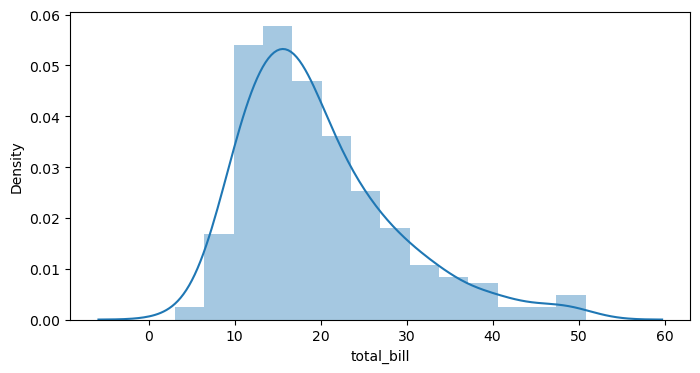

In [68]:
# Distribution Plot

plt.figure(figsize=(8,4))

sns.distplot(df['total_bill'])
plt.show()

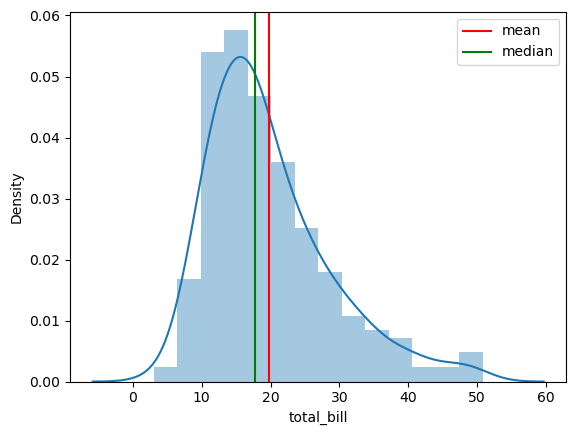

In [74]:
# Finding mean and median
mn = np.mean(df['total_bill'])
md = np.percentile(df['total_bill'],50)

sns.distplot(df['total_bill'])
plt.axvline(mn, color='red',label='mean')
plt.axvline(md,color='green',label='median')

plt.legend()


#### Categorical Plots

In [75]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

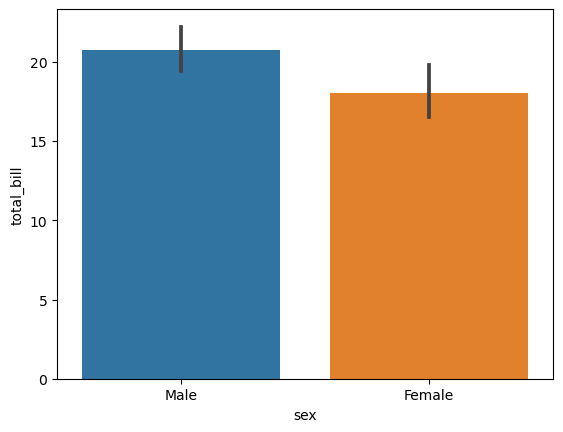

In [77]:
# plot of sex against total_bill

sns.barplot(x='sex', y='total_bill', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

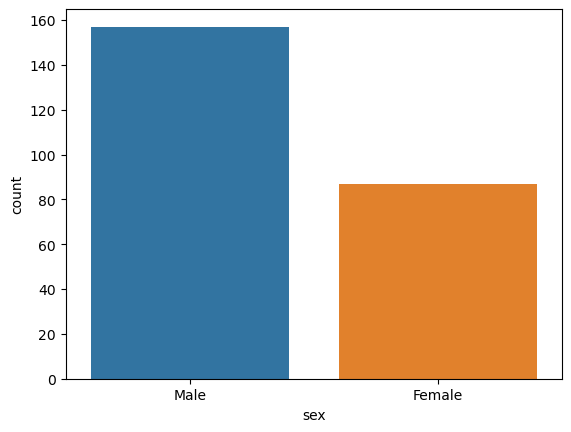

In [78]:
# Number of males and females

sns.countplot(df['sex'])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

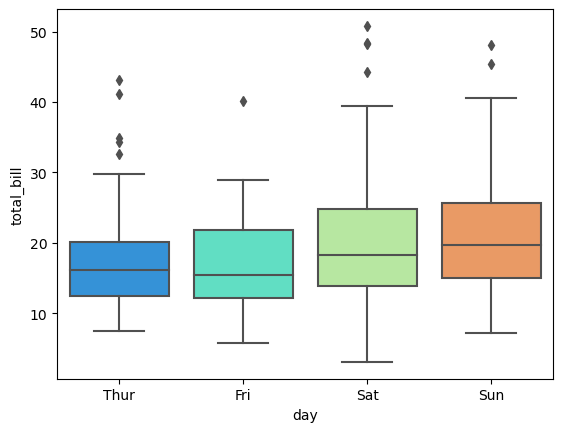

In [79]:
## Box Plots
sns.boxplot(x='day',y='total_bill',data=df,palette='rainbow')

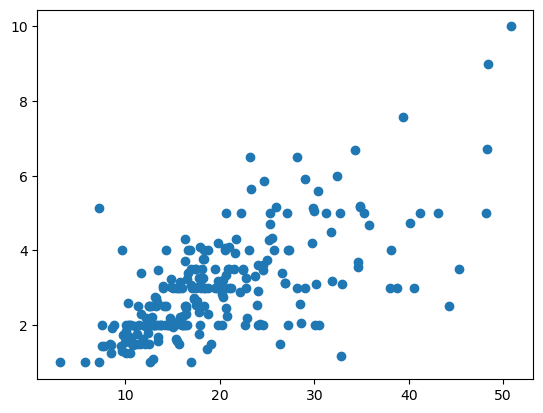

In [81]:
## Regression Plots
plt.scatter(x='total_bill',y='tip',data=df)

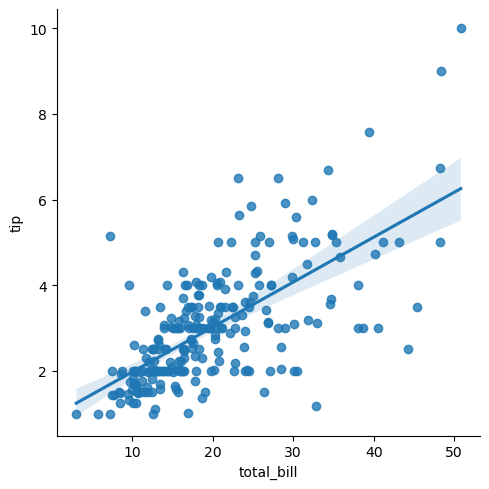

In [84]:
sns.lmplot(x='total_bill',y='tip',data=df)

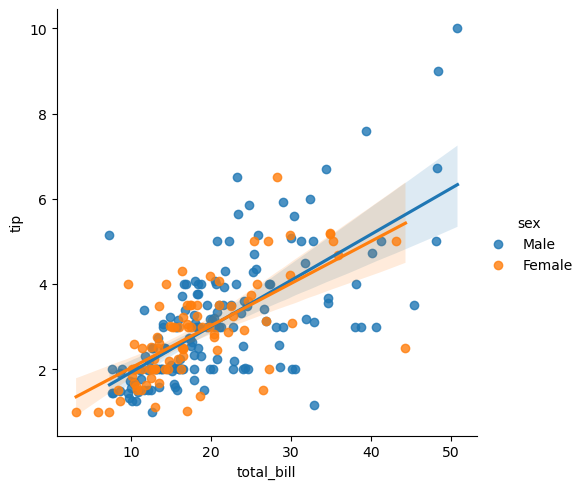

In [86]:
# lmplots with hue

sns.lmplot(x='total_bill', y='tip',data=df, hue='sex')

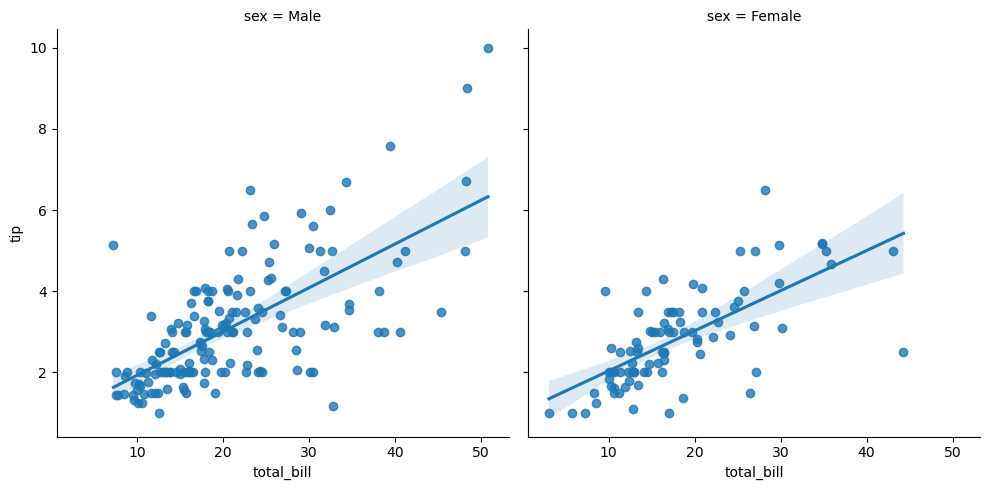

In [88]:
## lmplot with hue but different sheet
sns.lmplot(x='total_bill', y='tip', data=df, col='sex')

## 3. Plotly: Python's interactive plotting Library

In [89]:
import plotly.express as px

In [90]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
# plotly scatter plot
fig =px.scatter(x='total_bill',y='tip',color='sex', data_frame=df)
fig.show()

In [98]:
fig = px.scatter(x='total_bill',y='tip',color='sex',data_frame=df,size='size')
fig.show()

### DCA : Exponential Decline curve

In [102]:
t = np.linspace(1,1000)
dates = pd.date_range(start='1/10/2005', end='1/04/2021', periods=len(t))

d = dates.year

# Q0 = initial flowrate
Q0 =2000 #bbl/d
b = 0.05

Q = Q0 * np.exp(-b*t)



In [103]:
df_exp = pd.DataFrame({'t':t, 'Q':Q}, index = dates)
df_exp['year'] = d

df_exp.head()

,t,Q,year
2005-01-10 00:00:00.000000000,1.000000,1902.458849,2005
2005-05-09 03:25:42.857142858,21.387755,686.437174,2005
2005-09-05 06:51:25.714285716,41.775510,247.677364,2005
2006-01-02 10:17:08.571428576,62.163265,89.365901,2006
2006-05-01 13:42:51.428571432,82.551020,32.244627,2006


In [104]:
fig = px.line(data_frame =df_exp, x='t',y='Q')
fig.show()

## Animation

In [105]:
gm = px.data.gapminder()
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [108]:
fig = px.scatter(gm,x='gdpPercap', y='lifeExp',animation_frame='year',
                size='pop',color='continent',hover_name='country',
                log_x=True,size_max =55, range_x=[100,100000],range_y=[25,90])
fig.show()

## Radial Flow Profile : Impact of Oil Viscosity

(4862.888019081759, 5000.0)

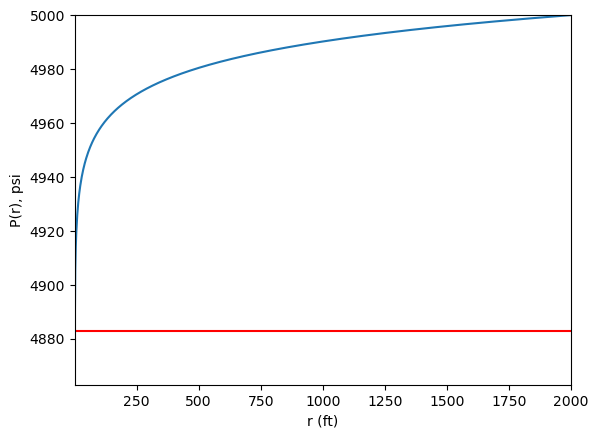

In [122]:
plt.style.use('default')
rw = 0.5 #ft
re = 2000 #ft

r = np.linspace(rw,re,1000)

Pv = 5000

mu1 = 0.5 #cp
mu =10 #cp

k = 100 #mD
h = 50 #ft
q = 1000 #bb/d
R = 1

m = (141.2*q*mu1*R/k/h)

Pr1 = Pv - m*(np.log(re/r))

plt.plot(r ,Pr1)
plt.xlabel('r (ft)')
plt.ylabel('P(r), psi')

Pwf1 = Pr1[0]

plt.axhline(Pwf1,c='red')
plt.xlim(rw,re)
plt.ylim(Pwf1-20,Pv)